In [1]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

from utils import *

import sys
sys.path.append("../")

# Shows files

In [2]:
config_names = ["MESSI+\nSAX+\nSIMD",
               #"MESSI+\nSFA+ED",
               "MESSI+\nSFA+ED+\nSIMD",
               #"MESSI+\nSFA+EW",
               "MESSI+\nSFA+EW+\nSIMD"]

        
path = "logs/MESSI_SFA_logs_index"
all_files = read_logs(log_type="index", path=path, config_names = config_names)

Config logs/MESSI_SFA_logs_index/ASTRO/09
Config logs/MESSI_SFA_logs_index/ASTRO/18
Config logs/MESSI_SFA_logs_index/ASTRO/36
-----------------
Config logs/MESSI_SFA_logs_index/BIGANN/09
Config logs/MESSI_SFA_logs_index/BIGANN/18
Config logs/MESSI_SFA_logs_index/BIGANN/36
-----------------
Config logs/MESSI_SFA_logs_index/DEEP1b/09
Config logs/MESSI_SFA_logs_index/DEEP1b/18
Config logs/MESSI_SFA_logs_index/DEEP1b/36
-----------------
Config logs/MESSI_SFA_logs_index/ETHC/09
Config logs/MESSI_SFA_logs_index/ETHC/18
Config logs/MESSI_SFA_logs_index/ETHC/36
-----------------
Config logs/MESSI_SFA_logs_index/ISC_EHB_DepthPhases/09
Config logs/MESSI_SFA_logs_index/ISC_EHB_DepthPhases/18
Config logs/MESSI_SFA_logs_index/ISC_EHB_DepthPhases/36
-----------------
Config logs/MESSI_SFA_logs_index/Iquique/09
Config logs/MESSI_SFA_logs_index/Iquique/18
Config logs/MESSI_SFA_logs_index/Iquique/36
-----------------
Config logs/MESSI_SFA_logs_index/LenDB/09
Config logs/MESSI_SFA_logs_index/LenDB/18
C

In [3]:
indexing_times = pd.DataFrame(columns=["method", "binning", "transformation", "indexing", "total time"])

i = 0
for ds_name, files in all_files.items():
    df_all = pd.DataFrame()
    for name, file in files.items():
        # print(file)
        df = pd.read_csv(file)
        # display(df)
        df["binning"] = df["binning"] * 1e-6
        df["indexing total"] = df["indexing total"] * 1e-6 
        df["total time"] = df["total time"] * 1e-6

        df["transformation"] = df[" transformation"] * 1e-6  / np.int32(file.split("/")[3])        
        df["indexing"] = df["indexing total"] - df["transformation"]
        
        # df["transformation"] = df[" transformation"] / (df[" indexing"] + df[" transformation"]) * df["total time"]
        # df["indexing"] = df[" indexing"] / (df[" indexing"] + df[" transformation"]) * df["total time"]
        
        df["method"] = name
        df["config"] = file.split("/")[3]
        df["dataset"] = file.split("/")[2]
        df_all = pd.concat([df_all, df], ignore_index=True)        
        indexing_times = pd.concat([indexing_times, df[["method", "config", "dataset", "binning", "transformation", "indexing", "indexing total", "total time"]]], ignore_index=True)

        i = i+1

subset = indexing_times.rename(columns={
    "method":"Method", 
    "binning": "Learning Bins", # "indexing total": "Indexing Total",
    "transformation" : "Transformation", 
    "indexing" : "Indexing",
    "indexing total" : "Indexing Total", 
    "total time" : "Total Time"})

# subset = subset[query_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+ED+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]

subset = subset[indexing_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]

subset.Method.replace("MESSI+\nSAX+\nSIMD", "MESSI", inplace=True)
subset.Method.replace("MESSI+\nSFA+EW+\nSIMD", "SOFA", inplace=True)
subset


,Method,Learning Bins,Transformation,Indexing,Total Time,config,dataset,Indexing Total
0,MESSI,0.000000,8.840131,7.537306,16.377437,09,ASTRO,16.377437
2,SOFA,2.156141,28.181577,6.653955,36.991673,09,ASTRO,34.835532
3,MESSI,0.000000,4.394923,6.357364,10.752287,18,ASTRO,10.752287
5,SOFA,3.309234,14.207388,6.292016,23.808638,18,ASTRO,20.499404
6,MESSI,0.000000,6.355121,45.204456,51.559577,36,ASTRO,51.559577
...,...,...,...,...,...,...,...,...
146,SOFA,2.243781,10.131366,4.106248,16.481395,09,TXED,14.237614
147,MESSI,0.000000,1.614979,3.550018,5.164997,18,TXED,5.164997
149,SOFA,3.351258,5.204217,4.958394,13.513869,18,TXED,10.162611
150,MESSI,0.000000,1.202726,6.375825,7.578551,36,TXED,7.578551


In [4]:
FAISS_all_files = read_faiss_logs(log_type="index")
FAISS_indexing_times = pd.DataFrame(columns=[
    "Method", "Learning Bins", "Transformation", "Indexing", "Total Time", "config", "dataset", "Indexing Total"])

i = 0
for ds_name, files in FAISS_all_files.items():
    df_all = pd.DataFrame()
    for config, file in files.items():
        # print(file)
        df = pd.read_csv(file)        
        df["Indexing"] = df["# index creation time in ms"] / 1000
        df["Method"] = "FAISS"
        if config == "9":
            config = "09"
        df["config"] = config
        
        name = file.split("/")[2]
        df["dataset"] = name[name.find("_")+1:name.rfind("_")]
        
        df_all = pd.concat([df_all, df], ignore_index=True)        
        FAISS_indexing_times = pd.concat([
            FAISS_indexing_times, df[["Method", "Indexing", "config", "dataset"]]], ignore_index=True)
        i = i+1
        
FAISS_indexing_times.fillna(0, inplace=True)
FAISS_indexing_times.head()

,Method,Learning Bins,Transformation,Indexing,Total Time,config,dataset,Indexing Total
0,FAISS,0,0,43.727886,0,18,ASTRO,0
1,FAISS,0,0,62.028719,0,36,ASTRO,0
2,FAISS,0,0,55.001067,0,09,ASTRO,0
3,FAISS,0,0,24.922127,0,18,BIGANN,0
4,FAISS,0,0,24.454261,0,36,BIGANN,0


In [5]:
np.unique(FAISS_indexing_times.dataset)

array(['ASTRO', 'BIGANN', 'DEEP1b', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1b', 'STEAD', 'TXED'], dtype=object)

In [6]:
np.unique(indexing_times.dataset)

array(['ASTRO', 'BIGANN', 'DEEP1b', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1b', 'STEAD', 'TXED'], dtype=object)

In [7]:
subset = pd.concat([subset, FAISS_indexing_times], ignore_index=True)    # 
subset

,Method,Learning Bins,Transformation,Indexing,Total Time,config,dataset,Indexing Total
0,MESSI,0.000000,8.840131,7.537306,16.377437,09,ASTRO,16.377437
1,SOFA,2.156141,28.181577,6.653955,36.991673,09,ASTRO,34.835532
2,MESSI,0.000000,4.394923,6.357364,10.752287,18,ASTRO,10.752287
3,SOFA,3.309234,14.207388,6.292016,23.808638,18,ASTRO,20.499404
4,MESSI,0.000000,6.355121,45.204456,51.559577,36,ASTRO,51.559577
...,...,...,...,...,...,...,...,...
148,FAISS,0.000000,0.000000,59.833825,0.000000,36,STEAD,0.000000
149,FAISS,0.000000,0.000000,69.629763,0.000000,09,STEAD,0.000000
150,FAISS,0.000000,0.000000,16.242055,0.000000,18,TXED,0.000000
151,FAISS,0.000000,0.000000,15.846089,0.000000,36,TXED,0.000000


In [8]:
subset.set_index(["Method"])[[ "Indexing Total", "Indexing", "Transformation",  "Learning Bins" ]].groupby(["Method"]).mean()

,Indexing Total,Indexing,Transformation,Learning Bins
Method,,,,
FAISS,0.000000,24.775684,0.000000,0.000000
MESSI,21.201493,17.121111,4.080381,0.000000
SOFA,41.773154,32.056709,9.716445,2.838359


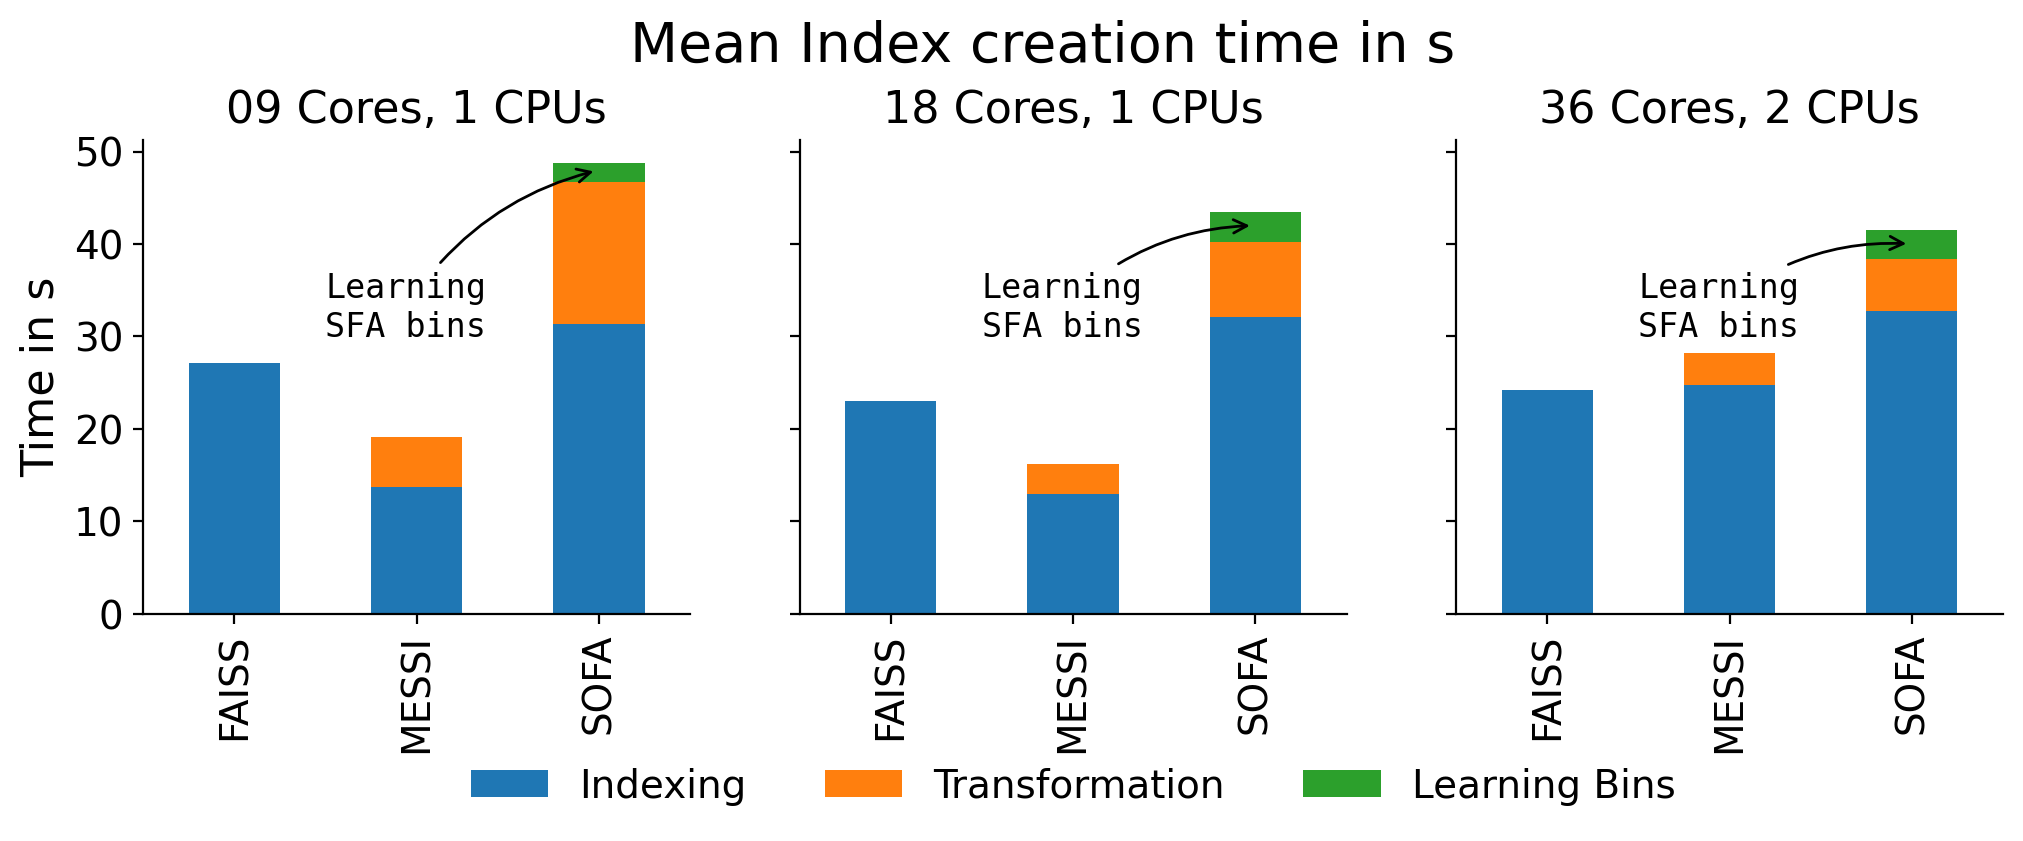

In [9]:
with plt.style.context({
    'font.size': 18,          # Default font size
    'axes.titlesize': 16,     # Font size for axes titles
    'axes.labelsize': 16,     # Font size for x and y labels
    'xtick.labelsize': 14,    # Font size for x tick labels
    'ytick.labelsize': 14,    # Font size for y tick labels
    'legend.fontsize': 14,    # Font size for legend
    'figure.titlesize': 16    # Font size for figure title
}):

    
    fig, axes = plt.subplots(1, 3, figsize=(12,3), sharey=True)
    ALL_CORES = ["09", "18", "36"]
    
    for i, CORES in enumerate(ALL_CORES):    
        subset_plot = subset[(subset.config==CORES)]
    
        #, "Transformation"
        subset_plot.set_index(["Method"])[[ "Indexing", "Transformation",  "Learning Bins" ]].groupby(["Method"]).mean() \
            .plot(kind='bar', stacked=True, ax=axes[i])
    
        if i <= 1:
            axes[i].legend([],[], frameon=False)
        axes[i].set_title(str(CORES)+" Cores, " + str(np.int32(np.ceil(np.int32(CORES)/18))) +" CPUs")
        axes[i].set_xlabel("")
    
        if i == 0:
            axes[i].set_ylabel("Time in s")
        sns.despine()
    
    plt.legend(loc='upper center', frameon=False, bbox_to_anchor=(-.7, -0.25), ncols=3)
    # sns.move_legend(ax[2], "upper center", frameon=False, bbox_to_anchor=(.5, -0.45), ncol=4)
    
    fig.subplots_adjust(top=0.9)
    fig.suptitle("Mean Index creation time in s", y=1.10, size=20)
    
    # axes[-1].legend(axes[-1], "bottom left", bbox_to_anchor=(1, 1))
    
    axes[0].annotate('Learning\nSFA bins', xy=(2, 48), xytext=(0.5, 30),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=-.2"), 
             fontsize=12,fontfamily='monospace', ha='left');
    
    axes[1].annotate('Learning\nSFA bins', xy=(2, 42), xytext=(0.5, 30),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=-.2"), 
             fontsize=12,fontfamily='monospace', ha='left');
    
    
    axes[2].annotate('Learning\nSFA bins', xy=(2, 40), xytext=(0.5, 30),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=-.2"), 
             fontsize=12,fontfamily='monospace', ha='left');

    # plt.tight_layout()
    plt.savefig("images/experiment_index_creation.pdf", bbox_inches='tight')

In [10]:
subset.set_index([
    "Method", "config"])[["Indexing Total", "Transformation", "Learning Bins", "Indexing"]].groupby(["Method", "config"]).mean()


Indexing Total  Transformation  Learning Bins   Indexing
Method config                                                          
FAISS  09            0.000000        0.000000       0.000000  27.177720
       18            0.000000        0.000000       0.000000  22.982606
       36            0.000000        0.000000       0.000000  24.166724
MESSI  09           19.182878        5.508515       0.000000  13.674363
       18           16.258311        3.342564       0.000000  12.915747
       36           28.163289        3.390065       0.000000  24.773224
SOFA   09           46.692035       15.387769       2.119788  31.304267
       18           40.206025        8.094274       3.250006  32.111751
       36           38.421402        5.667291       3.145281  32.754111

In [11]:
subset[subset.Method == ("MESSI 2.0")][["dataset", "Indexing Total"]]

,dataset,Indexing Total


In [12]:
ds_sizes = {
     'ASTRO'   : [100_000_000],
     'BIGANN'  : [100_000_000], 
     'DEEP1b'  : [100_000_000],
     'ETHC'    : [4_999_932],
     'ISC_EHB_DepthPhases' : [100_000_000],
     'Iquique' : [578_853], 
     'LenDB' : [37_345_260], 
     'Meier2019JGR' : [6_361_998], 
     'NEIC' : [3_473_541], 
     'OBS' : [15_508_794], 
     'OBST2024' : [4_160_286],
     'PNW' : [31_982_766], 
     'SALD' : [100000000], 
     'SCEDC' : [100000000], 
     'SIFT1b' : [100000000], 
     'STEAD' : [87_323_433], 
     'TXED' : [35_851_641]
    }

df_ds_sizes = pd.DataFrame(ds_sizes).T.rename(columns={0: "Size"})
df_ds_sizes.head()

,Size
ASTRO,100000000
BIGANN,100000000
DEEP1b,100000000
ETHC,4999932
ISC_EHB_DepthPhases,100000000


In [35]:
df_rate = subset[(subset.config == "36")][["Method", "dataset", "Indexing Total", "Indexing"]]
df_rate.loc[df_rate["Method"] == "FAISS", "Indexing Total"] = df_rate[df_rate["Method"] == "FAISS"]["Indexing"]
df_rate.set_index("dataset", inplace=True)
# df_rate.head()

for method in np.unique(df_rate.Method):
    df_join = df_rate[df_rate.Method == method].join(df_ds_sizes)
    
    print(f"Rate TS/Sec {method} \t " +
          f"{np.round(np.mean(df_join['Size']) / np.mean(df_join['Indexing Total']))} \t"
          # + f"{np.round(np.median(df_join['Size']) / np.median(df_join['Indexing Total']))}"
          )

Rate TS/Sec FAISS 	 2257812.0 	
Rate TS/Sec MESSI 	 1937413.0 	
Rate TS/Sec SOFA 	 1420144.0 	


In [37]:
1420144.0 / 2257812.0

0.628991253479032

In [39]:
1420144.0 / 1937413.0

0.7330104629214318